In [1]:
import pandas as pd
df = pd.read_csv("Bigdata_balanced.csv",header = None)
df.columns = ['sentiment','file','content']
df

,sentiment,file,content
0,0,c61431815.,client call forwarded automatic voice message ...
1,1,c61421773.,"client sorry call back ,"
2,0,c61526848.,"client , client name , client okay got wrong n..."
3,0,c61335655.,client not available
4,0,c61523875.,"client system 806 441 5706 not available tone ,"
...,...,...,...
27976,0,c61396708.,"client sorry, person called voice mailbox ,"
27977,1,c61514382.,"client hello , client , client getting , clien..."
27978,1,c61418373.,"client know , client many people call spoke sp..."
27979,0,c61356297.,"client hello , client not right ,"


In [3]:
test = df.iloc[22000:27980]
df = df.iloc[:22000]
test

,sentiment,file,content
22000,0,c61212480.,"client waited voice messaging system 2036 ,"
22001,0,c61454607.,"client hi, reached kimberly haley four, , clie..."
22002,1,c61512633.,"client hello , client see , client , client c ..."
22003,1,c61315909.,"client hello, name rachel calling optimum call..."
22004,0,c61328023.,"client not available ,"
...,...,...,...
27975,0,c61431862.,client call forwarded automatic voice message ...
27976,0,c61396708.,"client sorry, person called voice mailbox ,"
27977,1,c61514382.,"client hello , client , client getting , clien..."
27978,1,c61418373.,"client know , client many people call spoke sp..."


In [4]:
df["sentiment"].value_counts()

1    11014
0    10986
Name: sentiment, dtype: int64

In [5]:
df["file"].duplicated().sum()

0

In [6]:
df.drop_duplicates(keep=True, inplace=True)

C:\Users\CU696Aliasgar\AppData\Local\Temp\ipykernel_5852\2379638325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep=False, inplace=True)


In [7]:
df["sentiment"].value_counts()

1    11014
0    10986
Name: sentiment, dtype: int64

In [8]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
stopword = stopwords.words('english')
stopword.pop(stopword.index('against'))
stopword.pop(stopword.index('not'))
stopword.pop(stopword.index('haven\'t'))
stopword.pop(stopword.index('more'))
stopword.pop(stopword.index('most'))
stopword.pop(stopword.index('own'))
stopword.pop(stopword.index('very'))
stopword.append('\'m')
stopword.append('agent')
stopword.append('client')
stopword.append('\'re')
stopword.append('n')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [9]:
import re
from nltk.stem import WordNetLemmatizer
ps = WordNetLemmatizer()
corpus = []
for i in range(0,len(df)):
    review = re.sub('[^a-z,A-Z0-9]',' ',df['content'][i])
    review = review.lower()
    review = review.split()
    review = [ps.lemmatize(word) for word in review if not word in stopword]
    review = ' '.join(review)
    corpus.append(review)
corpus

['call forwarded automatic voice message system 860 491 0919 not available tone',
 'sorry call back ,',
 ', name , okay got wrong number ,',
 'not available',
 'system 806 441 5706 not available tone ,',
 'call soon possible thank very much good day',
 'good , yes , hello, speed okay good thing , 13th, yeah nope , not gonna change anything might able know not gonna change , properly afternoon one five yeah, certified fine , need clear guess , show , cooler okay located ,',
 'hello , hello , behalf optimum , speaking , 314 3933 , 539 , 3873 , okay, try 304 okay 951 7190 , yes , yes , one today one dvr box , one dvr , plus 10 modem , 22 , , stop go called let see called not long ago back june, believe get lower payment well 264 fellow talked reduce 27 4 okay offering sound great gonna more added really one , okay , 162 , 12 month yes , need call let know run would like continue rate , said right moving forward right , , really wanna , probably sure , said unlimited text , 90 month , , ca

In [10]:
file = open('negative_keyword.txt','r')
f = file.readlines()
review = []
for word in f:
    word = re.sub('[^a-z,A-Z0-9]',' ',word)
    review.append(word)
    revie = ' '.join(review)
review = [ps.lemmatize(word) for word in review if not word in stopword]
corpus.append(revie)

In [11]:
file = open('positve_keyword.txt','r')
f = file.readlines()
review = []
for word in f:
    word = re.sub('[^a-z,A-Z0-9]',' ',word)
    review.append(word)
    revie = ' '.join(review)
review = [ps.lemmatize(word) for word in review if not word in stopword]
corpus.append(revie)

In [12]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
words = []
for sent in corpus:
    sent_token = sent_tokenize(sent)
    for sent in sent_token:
        words.append(simple_preprocess(sent))
#words.append(review)

In [13]:
len(words)

21996

In [14]:
words[21995]

['thank',
 'you',
 'so',
 'much',
 'thanks',
 'lot',
 'glad',
 'appreciate',
 'appreciated',
 'lovely',
 'loved',
 'it',
 'loving',
 'it',
 'amazing',
 'amazed',
 'awesome',
 'fantastic',
 'happy',
 'happier',
 'happiest',
 'wonderful',
 'generous',
 'charming',
 'enjoy',
 'enjoyed',
 'enjoying',
 'liked',
 'it',
 'excellent',
 'super',
 'superb',
 'pleased',
 'grateful',
 'greatful',
 'really',
 'helpful',
 'very',
 'helpful']

In [15]:
import gensim
import numpy as np
from sklearn.model_selection import GridSearchCV
model = gensim.models.Word2Vec(words,min_count = 1,window = 7,vector_size=100)

In [16]:
d = model.wv.key_to_index
if 'appreciate' in d.keys():
    print('ok')

ok


In [17]:
print(model)

Word2Vec(vocab=12936, vector_size=100, alpha=0.025)


In [18]:
model.wv.most_similar("appreciate")

[('thanks', 0.7437958717346191),
 ('thank', 0.7176656723022461),
 ('letting', 0.7053824067115784),
 ('definitely', 0.6912853717803955),
 ('future', 0.6828015446662903),
 ('taking', 0.6796150207519531),
 ('bye', 0.6753979921340942),
 ('altar', 0.6722680330276489),
 ('feral', 0.663225531578064),
 ('you', 0.663031816482544)]

In [19]:
def documentVector(d):
    d = [word for word in d.split() if word in model.wv.index_to_key]
    return np.mean(model.wv[d],axis = 0)

In [20]:
documentVector(df['content'].values[36])

array([-0.15437044, -0.03793075,  0.34119537,  0.26437366, -0.25050795,
       -0.60208493,  0.12355775,  0.1009098 , -0.02215217, -0.634027  ,
       -0.30087823, -0.282803  ,  0.25969833,  0.15895368,  0.04052945,
       -0.08698335, -0.02711351, -0.4293694 , -0.1557697 , -0.2807756 ,
       -0.08203797, -0.14122015,  0.67597544, -0.14936109, -0.21318291,
        0.33745492, -0.21113761,  0.04075251,  0.05759067,  0.3365029 ,
        0.29744726, -0.20328812, -0.15268113, -0.23892884, -0.03860335,
       -0.5432116 ,  0.1414734 , -0.12322465, -0.18248552, -0.10245043,
        0.10213281, -0.23911494, -0.38422158, -0.15769532,  0.2562157 ,
        0.14716241, -0.1533468 , -0.22788286,  0.2596111 , -0.13209552,
        0.43145248, -0.24451053,  0.06442643, -0.20861201, -0.21277343,
        0.34389746,  0.18608508, -0.2032681 , -0.50959665,  0.15844807,
       -0.1537854 , -0.10058066,  0.02125819,  0.18245423, -0.18156478,
        0.1517679 ,  0.1697142 ,  0.073093  , -0.30622345,  0.20

In [21]:
df.loc[len(df.index)] = [0,"negative"," ".join(words[21994])]

C:\Users\CU696Aliasgar\AppData\Local\Temp\ipykernel_5852\3332484255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[len(df.index)] = [0,"negative"," ".join(words[21994])]


In [22]:
df.loc[len(df.index)+1] = [1,"positive"," ".join(words[21995])]

C:\Users\CU696Aliasgar\AppData\Local\Temp\ipykernel_5852\2015204516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[len(df.index)+1] = [1,"positive"," ".join(words[21995])]


In [23]:
df

,sentiment,file,content
0,0,c61431815.,client call forwarded automatic voice message ...
1,1,c61421773.,"client sorry call back ,"
2,0,c61526848.,"client , client name , client okay got wrong n..."
3,0,c61335655.,client not available
4,0,c61523875.,"client system 806 441 5706 not available tone ,"
...,...,...,...
21997,1,c61339422.,"client yeah , client good , client job , clien..."
21998,1,g22550752.,"client name adam calling upgrade , client yeah..."
21999,0,c61335033.,"client carlos okay , client alright okay frien..."
22000,0,negative,absurd abysmal awful terrible horrible patheti...


In [24]:
from tqdm import tqdm
X=[]
l = []
for doc in tqdm(test["content"].values):
    try:
        X.append(documentVector(doc))
    except:
        print(test[test["content"] == doc])
        l.append(test.index[df["content"] == doc])

100%|██████████| 5980/5980 [01:21<00:00, 73.42it/s] 


In [25]:
q = []
for i in l:
    for j in i:
        q.append(j)


In [26]:
w = pd.DataFrame({'q':q})
w['q'].duplicated().sum()

0

In [27]:
w = w.drop_duplicates(subset=['q'])

In [28]:
w.size

0

In [29]:
w = w.iloc[:,0].tolist()

In [30]:
w

[]

In [31]:
len(w)

0

In [33]:
test.drop(w,axis = 0,inplace = True)

C:\Users\CU696Aliasgar\AppData\Local\Temp\ipykernel_5852\3871147828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(w,axis = 0,inplace = True)


In [34]:
test.reset_index(inplace=True,drop=True)
test

,sentiment,file,content
0,0,c61212480.,"client waited voice messaging system 2036 ,"
1,0,c61454607.,"client hi, reached kimberly haley four, , clie..."
2,1,c61512633.,"client hello , client see , client , client c ..."
3,1,c61315909.,"client hello, name rachel calling optimum call..."
4,0,c61328023.,"client not available ,"
...,...,...,...
5975,0,c61431862.,client call forwarded automatic voice message ...
5976,0,c61396708.,"client sorry, person called voice mailbox ,"
5977,1,c61514382.,"client hello , client , client getting , clien..."
5978,1,c61418373.,"client know , client many people call spoke sp..."


In [35]:
Y = test["sentiment"]

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state = 52)

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
rf = RandomForestClassifier()
n_estimators = [int(x) for x in np.linspace(start = 1978, stop = 1984, num = 20)]

max_features = ['auto', 'log2']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10] 

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_G = RandomizedSearchCV(rf,parameters,cv = 3,n_jobs = 4)


In [ ]:
rf_G.fit(x_train,y_train)

In [ ]:
rf_G.best_params_

0.7872909698996655


C:\Users\CU696Aliasgar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


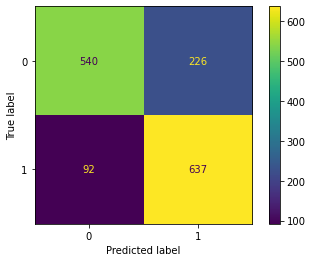

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
rf1 = RandomForestClassifier(n_estimators = 1978,min_samples_split = 2,min_samples_leaf = 1,max_features = 'auto',max_depth = 20,bootstrap = False)
rf1.fit(x_train,y_train)
y_pred = rf1.predict(x_test)
print(accuracy_score(y_test,y_pred))
plot_confusion_matrix(rf1,x_test,y_test)
plt.show()

In [ ]:
y_testdf = pd.DataFrame(y_test)

In [ ]:
result = pd.merge(y_testdf,df,left_index=True,right_index=True)
(result['sentiment_x'] == result['sentiment_y']).value_counts()
result.drop(['sentiment_x'],axis = 1,inplace = True)
result

In [ ]:
dataset = pd.DataFrame({'sentiment from ML model':y_pred,'Transcript':result['content'],'sentiment from QEVAL.ai(VOCI)':y_test,'unique - id':result['file']})


In [ ]:
accuracy_score(dataset['sentiment from ML model'],dataset['sentiment from QEVAL.ai(VOCI)'])

In [ ]:
dataset

In [ ]:
k = []
z = dataset.index
for index in z:
    k.append(index)
k

In [ ]:
import re
from nltk.stem import WordNetLemmatizer
ps = WordNetLemmatizer()
corpus = []
for i in k:
    review = re.sub('[^a-z,A-Z0-9]',' ',dataset['Transcript'][i])
    review = review.lower()
    review = review.split()
    review = [ps.lemmatize(word) for word in review if not word in stopword]
    review = ' '.join(review)
    corpus.append(review)
    dataset['Transcript'][i] = review
corpus

In [ ]:
words = []
k = 0

for text in dataset['Transcript'].values:
    
    l=[]
    #print(type(text))
    words = text.split(' ')
    for w in words:
        if word in model.wv.index_to_key and word != 'client':
            print(w)
            l.append(w)
    s = " ".join(l)
    try:
        dataset['Transcript'][k] = s
    except:
        print(s)
    k = k+1
dataset

In [ ]:
dataset

In [ ]:
dataset.to_csv("result.csv",index=False)

In [ ]:
notequal = dataset[dataset['sentiment from ML model'] != dataset['sentiment from QEVAL.ai(VOCI)']]
notequal

In [ ]:
notequal.to_csv("notequal_sentiment.csv")

In [ ]:
from sklearn.naive_bayes import GaussianNB
c = GaussianNB()
c.fit(x_train,y_train)
y_pred = c.predict(x_test)

print(accuracy_score(y_test,y_pred))
plot_confusion_matrix(c,x_test,y_test)